In [1]:
import anndata
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import math
import pickle
import seaborn as sns
import scipy
import sys
import scanpy as sc
import pandas as pd

from scbasset.utils import *

### load the data and model

In [2]:
data_path = '../data/multiome_example'

# read the cell annotations based on scRNA
ad = anndata.read_h5ad('%s/other/ad_rna_annotate.h5ad'%data_path)
sc.pp.normalize_total(ad, target_sum=1e6)
sc.pp.log1p(ad)

# load model
model = make_model(32, ad.shape[0], show_summary=False)
model.load_weights('%s/trained_model/best_model.h5'%data_path)

### score a TF of interest

In [3]:
scores = motif_score('PAX5', model, motif_fasta_folder='../data/Homo_sapiens_motif_fasta')
ad.obs['PAX5_activity'] = scores

### plot cell annotation (left), TF expression (mid) and TF activity (right)

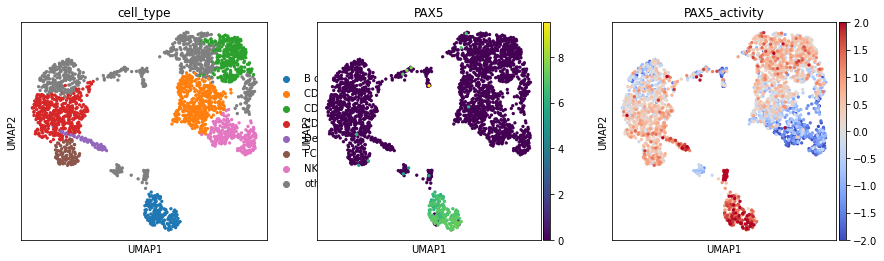

In [12]:
f, axs = plt.subplots(ncols=3, figsize=(15, 4))
sc.pl.umap(ad, color='cell_type', ax=axs[0], show=False)
sc.pl.umap(ad, color='PAX5', ax=axs[1], show=False)
sc.pl.umap(ad, color='PAX5_activity', ax=axs[2], cmap='coolwarm', vmin=-2, vmax=2)
f.tight_layout()